# Convolutional Neural Networks

In the previous tutorial we created a simple MLP through keras' Functional API and saw how we could tweak it a bit. We tested this network on a simple non-linear, two-dimensional, binary classification task. 

In order to see some more details about keras and Neural Networks in general, we'll introduce a more difficult task now: image classification.

In [1]:
!pip install --upgrade tensorflow
import tensorflow as tf
assert tf.__version__[0] == '2', 'this tutorial is for tensorflow versions of 2 or higher'

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 421.8MB 36kB/s 
     |████████████████████████████████| 3.9MB 30.2MB/s 
     |████████████████████████████████| 450kB 43.5MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


## Dealing with images...

The task we'll be solving is the "hello world" of image classification: *classifying handwritten digits* from the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

This dataset contains $70,000$ images with a resolution of $28 \times 28$. Each image represents a single digit from $0-9$, so we have $10$ classes in total.

The computer interprets each image as an array.

![](https://ujwlkarn.files.wordpress.com/2016/08/8-gif.gif?w=192&h=192&zoom=2)

Monochrome images, like these are 2D arrays with a shape of `(height, width)`. For instance our training set `x_train` has a shape of `(60000, 28, 28)`, which can be interpreted as $60,000$, $28 \times 28$ images.

Likewise colored images are represented as a 3D array, with a shape of `(height, width, channels)`. The third dimension is usually $3$ and represents the [RGB channels][1].

Let's inspect one image.

  [1]: https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images

Text(0.5, 1.0, 'Example: 13, Label: 6')

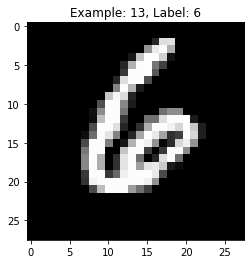

In [3]:
ind = 13
plt.imshow(x_train[ind], cmap='gray')
plt.title('Example: {}, Label: {}'.format(ind, y_train[ind]))


Before we can train a model, we need to one-hot encode the labels. This procedure takes a label, which is a scalar and converts it into a vector with $10$ dimensions, which has nine `0`'s and one `1`. The position of the `1` indicates the label. For instance the label `6` will become `[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]`. 

In [4]:
print('Before: ', y_train.shape, y_test.shape)

y_train = tf.keras.utils.to_categorical(y_train, 10)  # second parameter is the 
y_test = tf.keras.utils.to_categorical(y_test, 10)    # number of classes

print('After:  ', y_train.shape, y_test.shape)

Before:  (60000,) (10000,)
After:  (60000, 10) (10000, 10)


One final thing we'll need to do is to normalize the images. Images are usually represented as integers in the $[0, 255]$ range or as 32-bit floats in the $[0, 1]$ range. We usually prefer the latter so that we can use smaller learning rates and so that the weights don't need to take high values.

In [8]:
print('Before: min(x_train)={}, max(x_train)={}'.format(x_train.min(), x_train.max()))

x_train = x_train / 255.0
x_test = x_test / 255.0

print('After: min(x_train)={}, max(x_train)={}'.format(x_train.min(), x_train.max()))

Before: min(x_train)=0, max(x_train)=255
After:  min(x_train)=0.0, max(x_train)=1.0


## Logistic Regression

Now, let's start off with a very simple model. We'll create a simple logistic regressor to classify the images. 

Since the logistic regressor requires a 1D input, we'll need to flatten the image to $28 \times 28 = 784$ pixels.

![](https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/img/d5222c6e3d15770a.png)



In [17]:
inp = tf.keras.layers.Input(shape=(28 * 28))
out = tf.keras.layers.Dense(10, activation='softmax')(inp)

logistic_regression = tf.keras.models.Model(inp, out)

logistic_regression.compile(optimizer='sgd', loss='categorical_crossentropy', 
                            metrics=['accuracy'])

logistic_regression.fit(x_train.reshape(-1, 28 * 28), y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.7759 - accuracy: 0.8162
Epoch 2/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4556 - accuracy: 0.8814
Epoch 3/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4029 - accuracy: 0.8916
Epoch 4/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3766 - accuracy: 0.8972
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3599 - accuracy: 0.9006
Epoch 6/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3481 - accuracy: 0.9041
Epoch 7/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3391 - accuracy: 0.9061
Epoch 8/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3320 - accuracy: 0.9080
Epoch 9/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3262 - accuracy: 0.9089
Epoch 10/10
60

In [20]:
print('Test set accuracy:', logistic_regression.evaluate(x_test.reshape(-1, 28 * 28), y_test)[1])

10000/10000 [==============================] - 0s 39us/sample - loss: 0.3056 - accuracy: 0.9158
Test set accuracy: 0.9158


An interesting property of logistic regression, is that because it has a direct mapping from input features to output classes, the weights essentially depict the importance of each input feature towards the final prediction. 

If we rearange these $784 \times 10$ weights to $10$, $28 \times 28$ arrays, we can visualize which pixels mattered the most towards classifying esch of the $10$ classes.

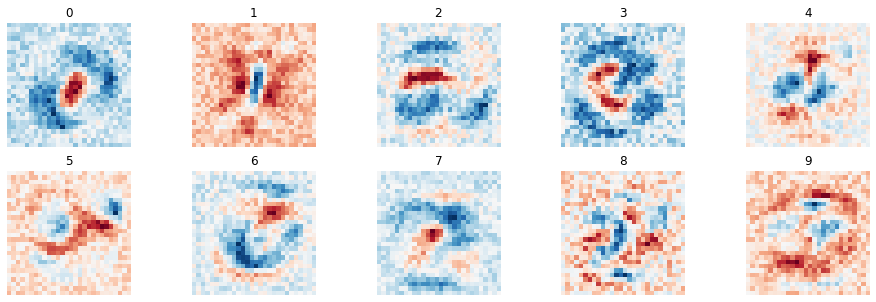

In [27]:
weights = logistic_regression.get_weights()[0]  # access the model's weights

plt.figure(figsize=(16, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = weights[:,i].reshape([28,28])
    plt.title(i)
    plt.imshow(weight, cmap='RdBu')
    ax = plt.gca()
    ax.axis('off')

Blue pixels contribute positively towards that prediction while red pixels contribute negatively.

From the above we can begin to understand the reason for this model's high accuracy. Some numbers are, from their nature, easier to detect than others. For example the $0$ is always drawn like a circle with a hole in the middle.

## Multi-Layer Perceptron

Now, let's train an MLP, like the one we did last time.

In [30]:
inp = tf.keras.layers.Input(shape=(28 * 28))
hid = tf.keras.layers.Dense(100, activation='relu')(inp)
out = tf.keras.layers.Dense(10, activation='softmax')(hid)

mlp = tf.keras.models.Model(inp, out)

mlp.compile(optimizer='sgd', loss='categorical_crossentropy', 
                            metrics=['accuracy'])

mlp.fit(x_train.reshape(-1, 28 * 28), y_train, epochs=10)

print('Test set accuracy:', mlp.evaluate(x_test.reshape(-1, 28 * 28), y_test)[1])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.6516 - accuracy: 0.8318
Epoch 2/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3423 - accuracy: 0.9043
Epoch 3/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2948 - accuracy: 0.9169
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2662 - accuracy: 0.9252
Epoch 5/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2445 - accuracy: 0.9319
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2269 - accuracy: 0.9373
Epoch 7/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2117 - accuracy: 0.9416
Epoch 8/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1981 - accuracy: 0.9451
Epoch 9/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1864 - accuracy: 0.9486
Epoch 10/10
10

This model did a bit better than the last time, however the model took a bit more time to train. Because the MLP does not have a direct mapping from input to output (instead the hidden layer comes in between), we cannot visualize the impact each input pixel has towards the final prediction.

## Training on Batches

Unfortunately the MNIST dataset isn't very indicative of an actual image classification problem, due to its small size. Most datasets range from hundreds of thousands to millions of images, while having a higher resolution. 
In most cases image datasets won't fit in memory to store as a numpy array (e.g. like we have `x_train` here), but will have to be loaded from the disk a few at a time. Even if they could be stored in memory, it wouldn't be effective for a model to see all of the images in order to calculate the total loss and compute the gradient. 

The solution is that the model just processes a small subset of the training set at each step and updates its parameters according to this. This subset is referred to as a **batch**. This leads to a variation of Gradient Descent, called [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent), which is what **SGD** stands for (i.e. the optimizer that we've been using).

By Machine Learning terminology:

- an **iteration** is a single training step where the model generates predictions for a batch of samples, estimates their loss, computes the gradient of this loss with respect to the parameters and updates them accordingly.

- an **epoch** is the time at which the model has seen all samples in the training set. 

For example if we used a batch size of $200$ (i.e. each batch consists of $200$ images), this would mean that the training set would be split into $60,000 / 200 = 3,000$ batches. Consequently, an epoch would consist of $3,000$ iterations. 

In regular Gradient Descent, since the model is trained on the whole training set, the batch size would be equal to the training set size and an iteration would be the same as an epoch. 

The tradeoff between SGD and regular GD is that the first requires much more training steps to converge, but each step is much quicker. Additionally, since each batch's loss is only an approximation of the training set's loss, the parameters might be updated in a direction that isn't globally optimal. While this sounds like a bad thing, it could be actually beneficial because it allows exploring a larger area in the parameter space, which could help get over local minima or reduce overfitting.

After each epoch the training set is shuffled so that we get different samples in each batch. This whole procedure is done seemlessly in the `model.fit()` function, whoever we'll see how to tweak it in a future tutorial.

For the time being we can control the batch size (and consequently the number of iterations per epoch) through the `batch_size` parameter in the `.fit()` method.

In [31]:
# Train the model again with a batch size of 256
mlp.fit(x_train.reshape(-1, 28 * 28), y_train, epochs=10, batch_size=256)

print('Test set accuracy:', mlp.evaluate(x_test.reshape(-1, 28 * 28), y_test)[1])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1672 - accuracy: 0.9546
Epoch 2/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1657 - accuracy: 0.9550
Epoch 3/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1645 - accuracy: 0.9552
Epoch 4/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1635 - accuracy: 0.9553
Epoch 5/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1623 - accuracy: 0.9560
Epoch 6/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1612 - accuracy: 0.9562
Epoch 7/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1601 - accuracy: 0.9566
Epoch 8/10
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1590 - accuracy: 0.9565
Epoch 9/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1579 - accuracy: 0.9572
Epoch 10/10
10

The type of Neural Network we've been using up till now is called a **Fully Connected (FC)** Neural Network, because for each layer, every one of its inputs are connected to all of its outputs.

## Convolutional Neural Networks

Convolutional Neural Networks (CNNs), are another type of Neural Networks, very popular when dealing with images. These networks employ **weight sharing** and **sparse connecticity** to reduce the number of parameters in each layer, allowing for the creation of deep networks. 

There are three main layers that are used in CNNs: convolutional, pooling and fully connected.

### Convolutional Layer

A convolutional layer performs a 2D convolution operation on the input. We won't look into the [mathematical definition](https://en.wikipedia.org/wiki/Convolution) of this operation, rather how it affects an input image.
